# **Final Project**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import importlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json



'''
import os
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/lib/cuda'



# Ensure this runs before any TensorFlow operations
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print("here")
        print(e)
'''

import glob
import os
import shutil

2024-05-15 18:56:59.788684: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
'''Imports'''
#from src.preprocessing import preprocess
#from src.training import get_best_model
#from src.validation import Validator
#from src.prediction import Predictor
import src.objects.stack
importlib.reload(src.objects.stack)
from src.objects.stack import Stack

In [3]:
def remove_directories():
    # List of directories to remove within 'data'
    data_dirs = ['images', 'test', 'train', 'validation']
    base_data_path = 'data'

    # Directory within 'src/models'
    model_dir = 'unet_tuning'
    base_model_path = os.path.join('src', 'models', model_dir)

    # Removing directories in 'data'
    for dir_name in data_dirs:
        dir_path = os.path.join(base_data_path, dir_name)
        shutil.rmtree(dir_path, ignore_errors=True)

    # Removing 'unet_tuning' directory
    #shutil.rmtree(base_model_path, ignore_errors=True)
remove_directories()

## **Preprocessing and Augmentation**

In [4]:
'''Calls Preprocessing functions'''
import src.preprocess.preprocess_list as preprocessing
importlib.reload(preprocessing)

# Set the batch size according to your system's capabilities
BATCH_SIZE = 8
RESOLUTION = (480, 360)

# Call the preprocess function
stack = preprocessing.preprocess(BATCH_SIZE, RESOLUTION)

Current directory: /app/rundir/CPSC542_final_project
Current directory2: /app/rundir/CPSC542_final_project


100%|██████████| 917/917 [00:01<00:00, 655.74it/s]


## **Training**

In [5]:
'''Calls training functions'''
import src.training as training
importlib.reload(training)
import src.objects.architecture.conv_autoencoder as conv_autoencoder
importlib.reload(conv_autoencoder)


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

stack = training.get_best_model(stack)

Num GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-05-15 18:59:30.050301: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 18:59:30.283039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /device:GPU:0 with 78827 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0
2024-05-15 18:59:30.319812: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78827 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


Reloading Tuner from ./src/models/unet_tuning/tuner0.json
HEREHREHERHEHRHEHRHEHRHEHRHEHRH
range(0, 2)
here
here
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 480, 360, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 480, 360, 64)      1664      
                                                                 
 batch_normalization (BatchN  (None, 480, 360, 64)     256       
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 480, 360, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 240, 180, 64)     0         
 )                                                               
               

2024-05-15 18:59:39.370666: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700


101/101 [==============================] - 50s 452ms/step - loss: 0.0143 - accuracy: 0.3419 - val_loss: 0.0446 - val_accuracy: 0.6600
Epoch 2/300
101/101 [==============================] - 37s 370ms/step - loss: 0.0074 - accuracy: 0.3894 - val_loss: 0.0347 - val_accuracy: 0.6664
Epoch 3/300
101/101 [==============================] - 39s 387ms/step - loss: 0.0077 - accuracy: 0.5195 - val_loss: 0.0283 - val_accuracy: 0.6644
Epoch 4/300
101/101 [==============================] - 38s 379ms/step - loss: 0.0069 - accuracy: 0.3874 - val_loss: 0.0132 - val_accuracy: 0.6635
Epoch 5/300
101/101 [==============================] - 37s 368ms/step - loss: 0.0070 - accuracy: 0.3819 - val_loss: 0.0079 - val_accuracy: 0.4146
Epoch 6/300
101/101 [==============================] - 36s 357ms/step - loss: 0.0065 - accuracy: 0.3924 - val_loss: 0.0103 - val_accuracy: 0.3751
Epoch 7/300
101/101 [==============================] - 38s 374ms/step - loss: 0.0066 - accuracy: 0.3816 - val_loss: 0.0103 - val_accurac

In [9]:
import matplotlib.pyplot as plt
from skimage.color import rgb2lab,lab2rgb
import numpy as np

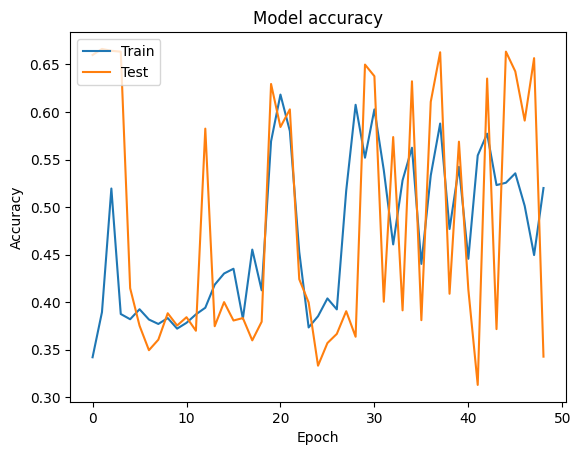

In [10]:
# Plot training & validation accuracy values
plt.plot(stack.final_history.history['accuracy'])
plt.plot(stack.final_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

15/15 [==============================] - 1s 91ms/step


ValueError: num must be an integer with 1 <= num <= 30, not 31

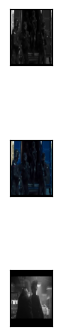

In [13]:


predictions = stack.final_model.predict(stack.bw_test_list)
predictions.shape

n = 10
plt.figure(figsize=(35, 25))
for i in range(n):
    show = 20+i*20
    # Display original gray images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(stack.bw_test_list[show], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display original color images
    ax = plt.subplot(3, n, i + 1 + n)
    
    plt.imshow(stack.test_list[show])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display pred images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    
    plt.imshow(predictions[show])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('result.png')

## **Prediction**

In [12]:
'''Calls prediction fucntions in prediction.py and methods from result'''
predictor = Predictor(model_path='path/to/saved/model')
input_data = 'path/to/input/data'
predictions = predictor.predict(input_data)

NameError: name 'Predictor' is not defined

## **Validation**

In [ ]:
'''Calls the validation fuctions in validation.py and methods from result'''
validator = Validator(model_path='path/to/saved/model')
validation_data = 'path/to/validation/data'
evaluation_metrics = validator.validate(validation_data)